In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassBalance, ClassificationReport, ConfusionMatrix, DiscriminationThreshold
from yellowbrick.features import JointPlotVisualizer, PCADecomposition, RadViz, Rank1D, Rank2D
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier, XGBRFClassifier


In [41]:
# Load data from UCI dataset repo
bank_note_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = np.loadtxt(bank_note_url, delimiter=',')
data = pd.DataFrame(data)
clean_columns = ['variance_of_wavelet', 'skewness_of_wavelet',
                 'curtosis_of_wavelet', 'entropy_of_wavelet',
                 'class']

data.columns = clean_columns

X = data.drop('class', axis=1)
y = data[['class']].astype('int')





In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
models = [
    DummyClassifier(strategy='most_frequent'), LogisticRegression(),
    SGDClassifier(), LogisticRegressionCV(), HistGradientBoostingClassifier(),
    RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(),
    BaggingClassifier(), AdaBoostClassifier(), XGBClassifier(),
    XGBRFClassifier(), MLPClassifier(max_iter=1000), LinearSVC(), NuSVC(), SVC(),
    GaussianNB(), DecisionTreeClassifier(), QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(n_neighbors=2), GaussianProcessClassifier()
]

In [44]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

        #categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    #     categorical_transformer = Pipeline(steps=[
    #     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor=ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features)
            ])

    #         preprocessor=ColumnTransformer(transformers=[
    #         ('num', numeric_transformer, numeric_features),
    #         ('cat', categorical_transformer, categorical_features)])

       
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
    
rf.fit(X_train, y_train)

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['variance_of_wavelet', 'skewness_of_wavelet', 'curtosis_of_wavelet',
       'entropy_of_wavelet'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [54]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix,classification_report

DummyClassifier(strategy='most_frequent')
model score: 0.549
AUC: 0.5
[[151   0]
 [124   0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       151
           1       0.00      0.00      0.00       124

    accuracy                           0.55       275
   macro avg       0.27      0.50      0.35       275
weighted avg       0.30      0.55      0.39       275



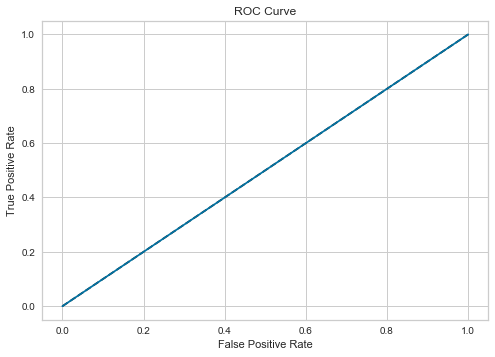

LogisticRegression()
model score: 0.978
AUC: 0.9801324503311258
[[145   6]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       151
           1       0.95      1.00      0.98       124

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



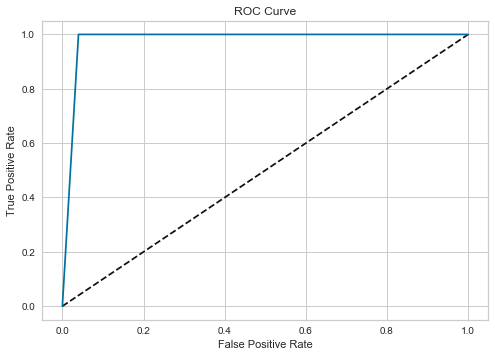

SGDClassifier()
model score: 0.989
AUC: 0.990066225165563
[[148   3]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       151
           1       0.98      1.00      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



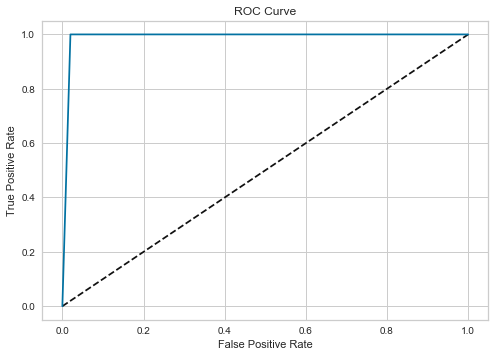

LogisticRegressionCV()
model score: 0.993
AUC: 0.9926564836573382
[[150   1]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.99      0.99      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



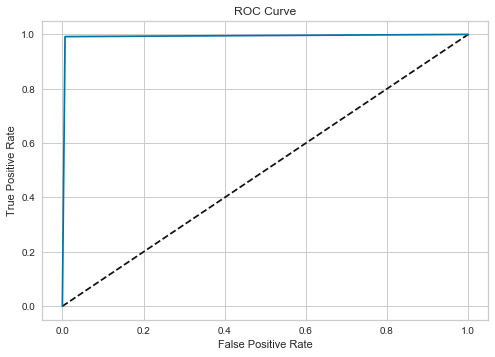

HistGradientBoostingClassifier()
model score: 0.996
AUC: 0.9966887417218543
[[150   1]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



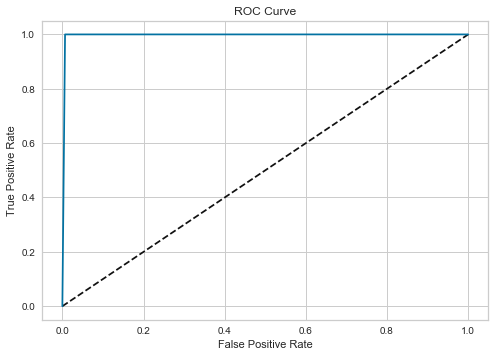

RandomForestClassifier()
model score: 0.989
AUC: 0.990066225165563
[[148   3]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       151
           1       0.98      1.00      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



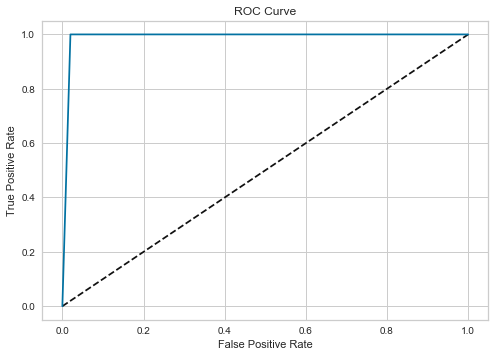

ExtraTreesClassifier()
model score: 1.000
AUC: 1.0
[[151   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



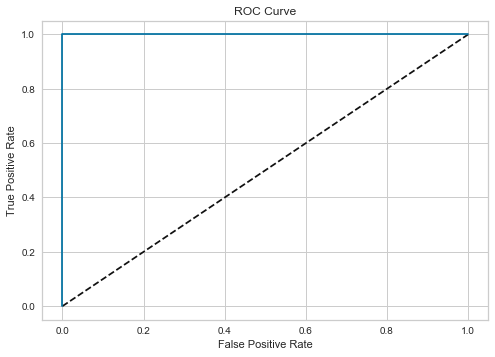

GradientBoostingClassifier()
model score: 0.996
AUC: 0.9966887417218543
[[150   1]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



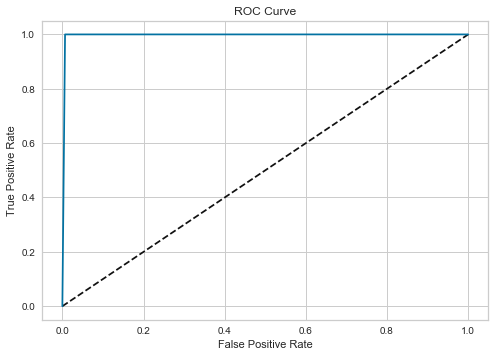

BaggingClassifier()
model score: 0.989
AUC: 0.9893452253791926
[[149   2]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.98      0.99      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



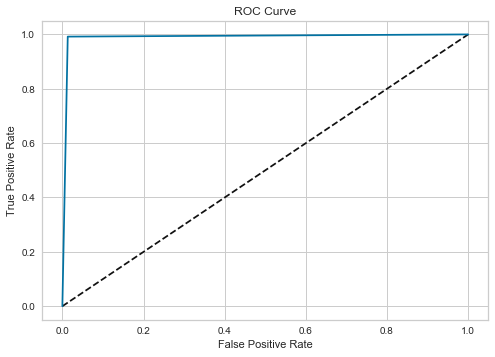

AdaBoostClassifier()
model score: 1.000
AUC: 1.0
[[151   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



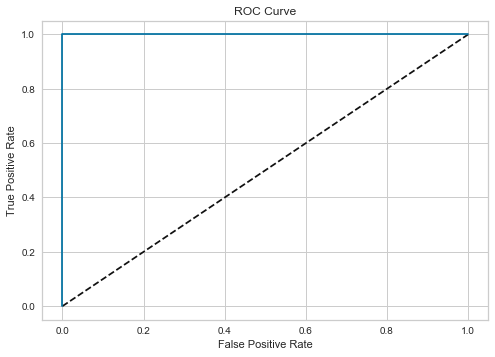

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.996
AUC: 0.9966887417218543
[[150   1]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



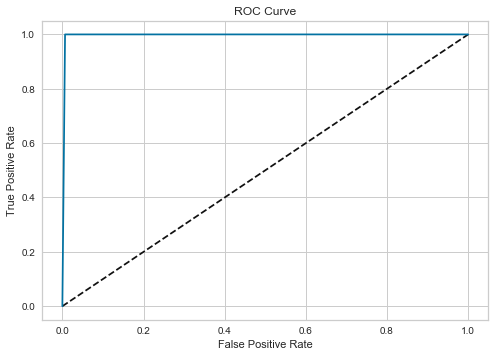

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)
model score: 0.985
AUC: 0.9860339671010468
[[148   3]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       151
           1       0.98      0.99      0.98       124

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



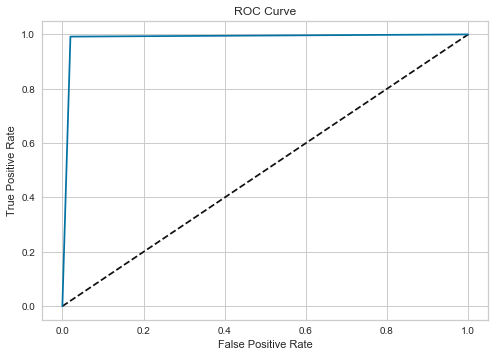

MLPClassifier(max_iter=1000)
model score: 1.000
AUC: 1.0
[[151   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



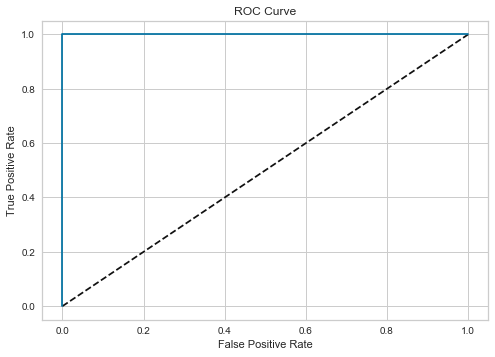

LinearSVC()
model score: 0.996
AUC: 0.9966887417218543
[[150   1]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



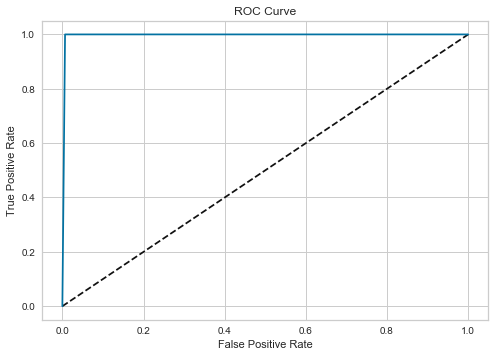

NuSVC()
model score: 0.975
AUC: 0.9768211920529801
[[144   7]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       151
           1       0.95      1.00      0.97       124

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



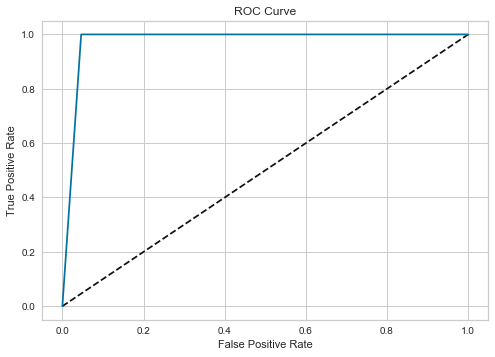

SVC()
model score: 1.000
AUC: 1.0
[[151   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



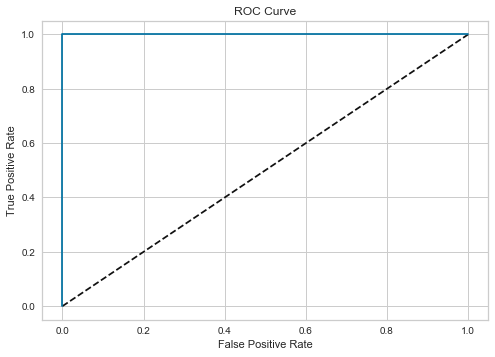

GaussianNB()
model score: 0.847
AUC: 0.8457861568041016
[[130  21]
 [ 21 103]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       151
           1       0.83      0.83      0.83       124

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



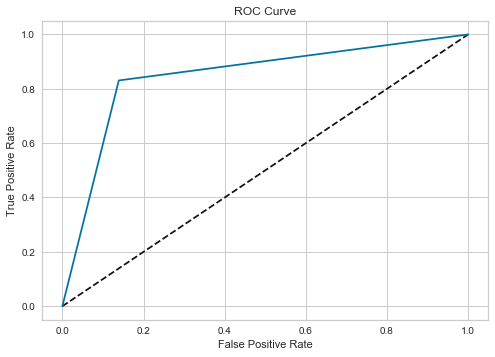

DecisionTreeClassifier()
model score: 0.982
AUC: 0.982722708822901
[[147   4]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.97      0.99      0.98       124

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



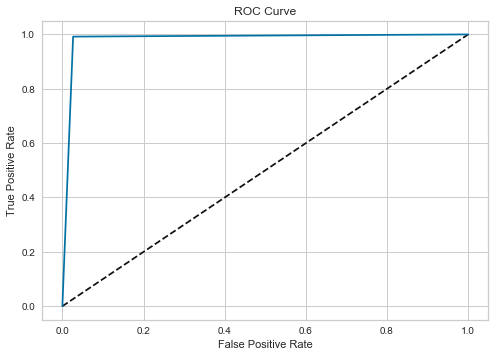

QuadraticDiscriminantAnalysis()
model score: 0.985
AUC: 0.9867549668874172
[[147   4]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       151
           1       0.97      1.00      0.98       124

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



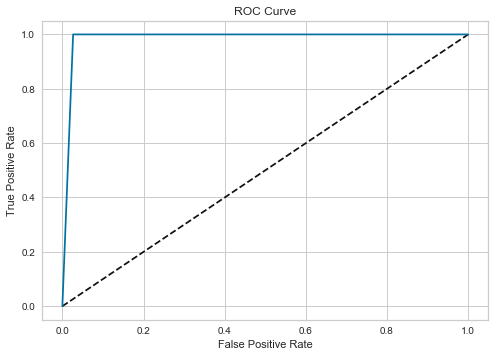

KNeighborsClassifier(n_neighbors=2)
model score: 1.000
AUC: 1.0
[[151   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



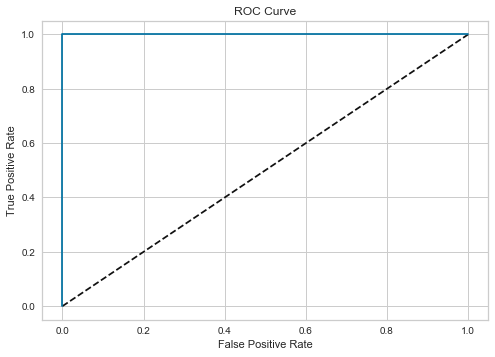

GaussianProcessClassifier()
model score: 0.996
AUC: 0.9966887417218543
[[150   1]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



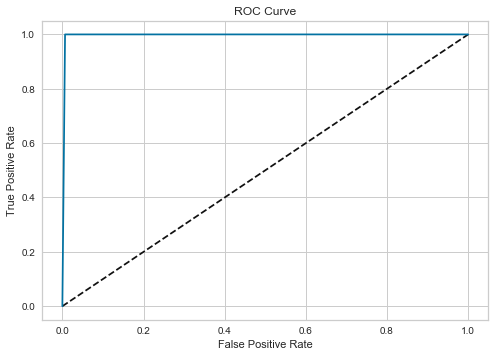

In [55]:
# Model scouce

for model in models:

    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
    
    pipe.fit(X_train, y_train) 
    
    y_pred=pipe.predict(X_test)
    
    print(model)
    
    print("model score: %.3f" % pipe.score(X_test, y_test))
    
    print("AUC: {}".format(roc_auc_score(y_test, y_pred)))
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    fpr,tpr,thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    
    